# Problem Statement

In [186]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [3]:
d1=pd.read_csv(r"C:\Users\valid\Downloads\Extended_Employee_Performance_and_Productivity_Data.csv.zip") 
d1

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [4]:
d1.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [5]:
d1.Resigned.value_counts()

Resigned
False    89990
True     10010
Name: count, dtype: int64

# Data Preprocessing 

In [7]:
d1.drop(columns=['Hire_Date'],inplace=True)

In [8]:
d1.Resigned=d1['Resigned'].astype(int)

In [9]:
d1.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                         int32
dtype: object

In [10]:
d1.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

# data type Conversion

In [12]:
l1=['Department','Gender','Job_Title','Education_Level']
for i in l1:
    d1[i]=le.fit_transform(d1[i])

In [13]:
d1

,Employee_ID,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,4,1,55,5,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,0
1,2,2,1,29,2,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,0
2,3,2,1,55,5,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,4,0,0,48,0,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,5,1,0,36,0,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2,1,27,6,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28,0
99996,99997,4,0,36,1,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48,1
99997,99998,7,1,53,0,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60,0
99998,99999,3,0,22,1,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10,0


# EDA

## Visualisation

In [16]:
d2=d1.corr()
#d2

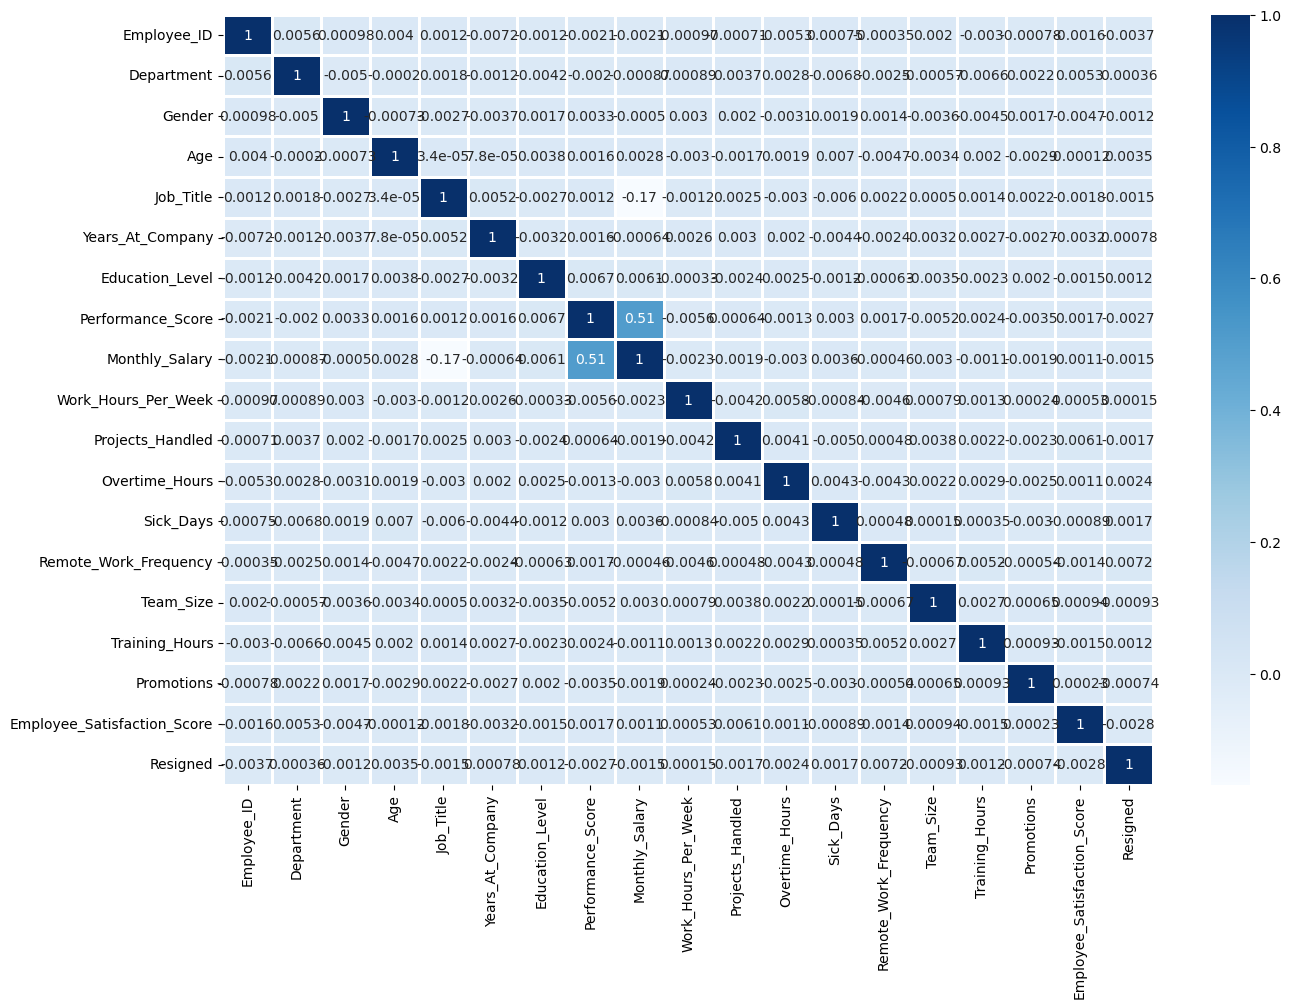

In [17]:
# Distribution Of Performance Scores
plt.figure(figsize=[15,10])
heatmap=sns.heatmap(d2,linewidth=1,annot=True,cmap=plt.cm.Blues)

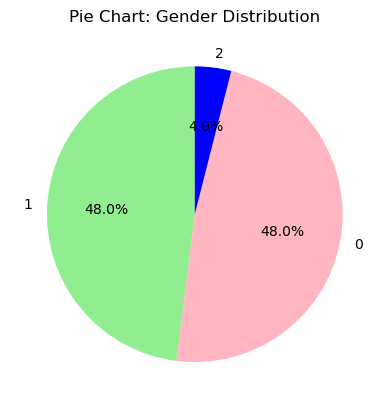

In [19]:
gender_counts = d1['Gender'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=90,colors=['lightgreen', 'lightpink','Blue'])
plt.title('Pie Chart: Gender Distribution')
plt.show()

# a relatively equal distribution of genders in the dataset, with a small percentage identifying with gender 2.

<Axes: xlabel='Gender', ylabel='Resigned'>

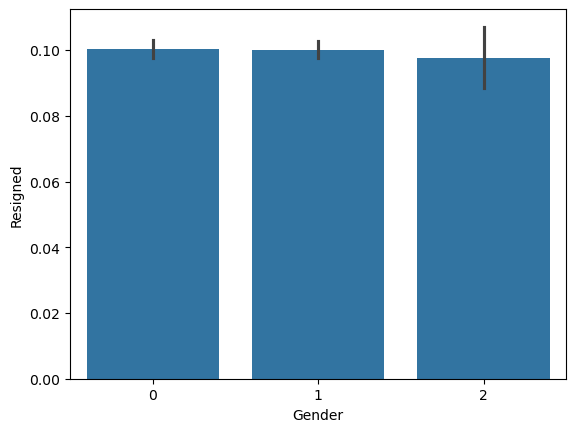

In [31]:
sns.barplot(x="Gender",y="Resigned",data=d1)

<Axes: xlabel='Education_Level', ylabel='count'>

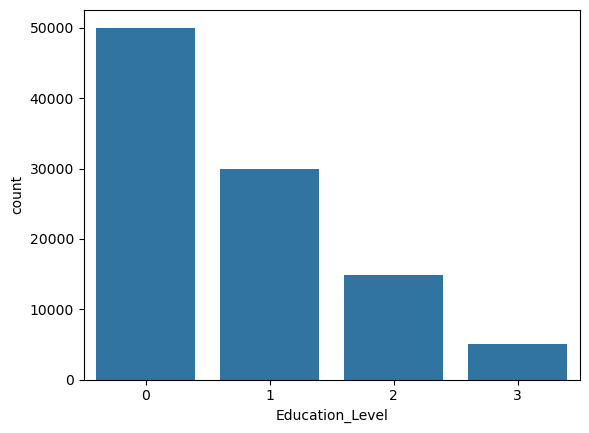

In [32]:
sns.countplot(x="Education_Level",data=d1)

<Axes: xlabel='Promotions', ylabel='Density'>

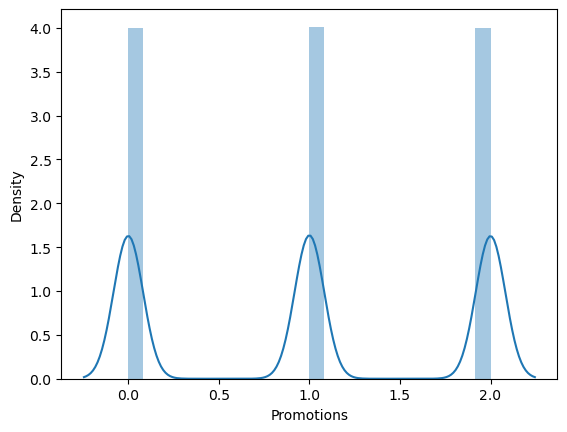

In [33]:
sns.distplot(d1["Promotions"])

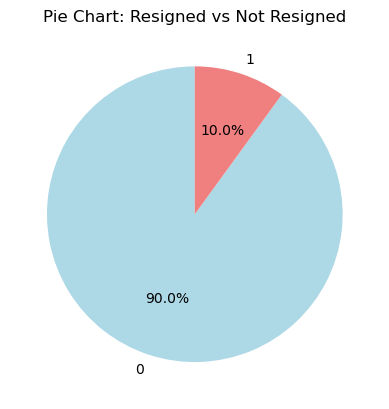

In [34]:
resigned_counts = d1['Resigned'].value_counts()
plt.pie(resigned_counts, labels=resigned_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Pie Chart: Resigned vs Not Resigned')
plt.show()

# This indicates a high retention rate within the organization, with a relatively small number of employees choosing to leave their positions

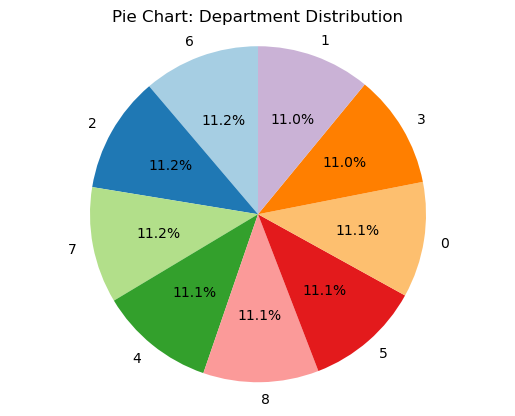

In [36]:
department_counts = d1['Department'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart: Department Distribution')
plt.axis('equal')
plt.show()

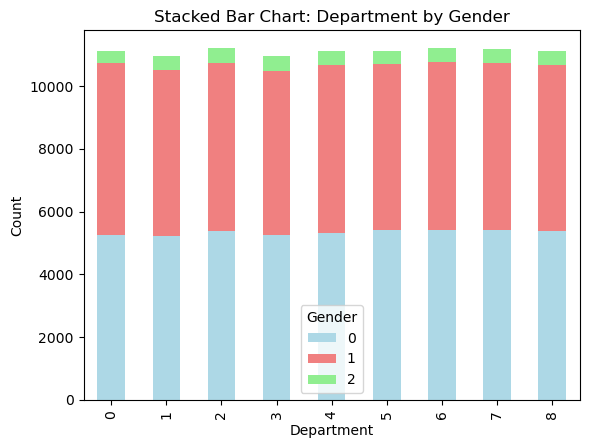

In [39]:
gender_department = pd.crosstab(d1['Department'], d1['Gender'])
gender_department.plot(kind='bar',stacked=True,color=['lightblue', 'lightcoral','lightgreen'])
plt.title('Stacked Bar Chart: Department by Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# the gender distribution varies across departments, with some departments having a clear 
# preference for a particular gender while others exhibit a more balanced representation.

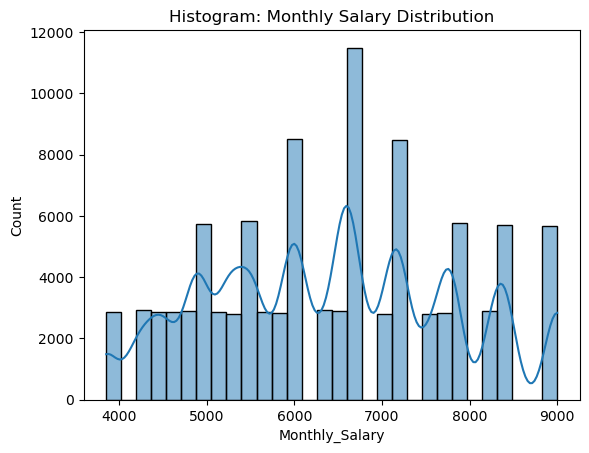

In [41]:
sns.histplot(d1['Monthly_Salary'], bins=30, kde=True)
plt.title('Histogram: Monthly Salary Distribution')
plt.show()

# the histogram reveals that the monthly salaries in the dataset are not evenly distributed, 
# with a concentration of individuals earning lower salaries and a smaller number earning higher salaries.

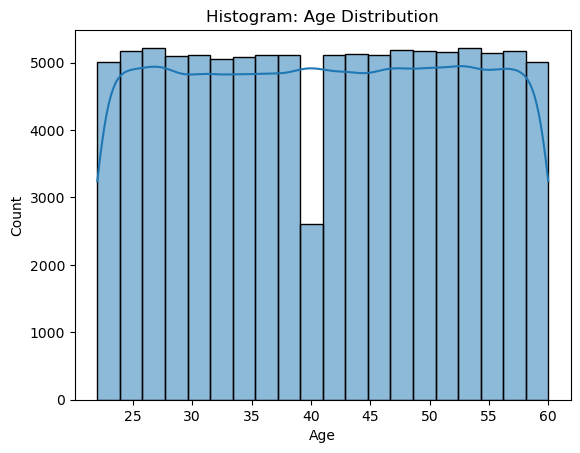

In [43]:
sns.histplot(d1['Age'], bins=20, kde=True)
plt.title('Histogram: Age Distribution')
plt.show()


# Spliting Data

In [46]:
x=d1.iloc[:,1:18]
y=d1.iloc[:,-1]
x.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,4,1,55,5,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,2,1,29,2,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,2,1,55,5,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,0,0,48,0,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,1,0,36,0,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25


In [48]:
import sklearn
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [50]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((80000, 17), (80000,), (20000, 17), (20000,))

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [57]:
lg.fit(x_train,y_train)

LogisticRegression()

In [58]:
p1=lg.predict(x_test)
p1

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
p_value=lg.predict_proba(x_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
m1=confusion_matrix(p1,y_test)
m1

array([[18085,  1915],
       [    0,     0]], dtype=int64)

In [62]:
TN,FP,FN,TP=m1.ravel()

In [64]:
# lp=TP/(TP+FP)
lp=0

In [65]:
# lr=TP/(TP+FN)
lr=0

In [66]:
# lf1=2*(lp*lr)/(lp+lr)
lf1=0

In [69]:
ac1=m1.diagonal().sum()/m1.sum()*100
ac1

90.425

In [73]:
print(classification_report(p1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.90     20000
   macro avg       0.50      0.45      0.47     20000
weighted avg       1.00      0.90      0.95     20000



# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [92]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
d_predict=dt.predict(x_test)

In [94]:
d_value=dt.predict_proba(x_test)

In [95]:
d_m=confusion_matrix(d_predict,y_test)
d_m

array([[15810,  1661],
       [ 2275,   254]], dtype=int64)

In [96]:
TN,FP,FN,TP=d_m.ravel()

In [102]:
dp=TP/(TP+FP)
dp

0.13263707571801567

In [104]:
dr=TP/(TP+FN)
dr

0.10043495452748122

In [106]:
df1=2*(dp*dr)/(dp+dr)
df1

0.11431143114311432

In [108]:
d_acc=d_m.diagonal().sum()/d_m.sum()*100
d_acc

80.32000000000001

In [110]:
print(classification_report(d_predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     17471
           1       0.13      0.10      0.11      2529

    accuracy                           0.80     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.78      0.80      0.79     20000



# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [115]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [116]:
rp=rf.predict(x_test)

In [117]:
r_m=confusion_matrix(rp,y_test)
r_m

array([[18085,  1915],
       [    0,     0]], dtype=int64)

In [118]:
TN,FP,FN,TP=r_m.ravel()

In [119]:
# rpr=TP/(TP+FP)
rpr=0

In [120]:
# rr=TP/(TP+FN)
rr=0

In [121]:
# rf1=2*(rpr*rr)/(rpr+rr)
rf1=0

In [122]:
r_acc=r_m.diagonal().sum()/r_m.sum()*100
r_acc

90.425

In [123]:
print(classification_report(rp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.90     20000
   macro avg       0.50      0.45      0.47     20000
weighted avg       1.00      0.90      0.95     20000



# KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [126]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [127]:
kp=knn.predict(x_test)

In [128]:
k_m=confusion_matrix(kp,y_test)
k_m

array([[18085,  1915],
       [    0,     0]], dtype=int64)

In [129]:
TN,FP,FN,TP=k_m.ravel()

In [130]:
# kpr=TP/(TP+FP)
kpr=0

In [132]:
# kr=TP/(TP+FN)
kr=0

In [133]:
# kf1=2*(kpr*kr)/(kpr+kr)
kf1=0

In [134]:
k_acc=k_m.diagonal().sum()/k_m.sum()*100
k_acc

90.425

In [135]:
print(classification_report(kp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.90     20000
   macro avg       0.50      0.45      0.47     20000
weighted avg       1.00      0.90      0.95     20000



# SVM - Support Vector Machine

In [137]:
from sklearn.svm import SVC
svc=SVC()

In [138]:
svc.fit(x_train,y_train)

SVC()

In [139]:
sp=svc.predict(x_test)
sp

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
sm=confusion_matrix(sp,y_test)
sm

array([[18085,  1915],
       [    0,     0]], dtype=int64)

In [141]:
TN,FP,FN,TP=sm.ravel()

In [142]:
# sp1=TP/(TP+FP)
sp1=0

In [143]:
# sr=TP/(TP+FN)
sr=0

In [144]:
# sf1=2*(sp1*sr)/(sp1+sr)
sf1=0

In [145]:
s_acc=sm.diagonal().sum()/sm.sum()*100
s_acc

90.425

In [146]:
print(classification_report(sp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.90     20000
   macro avg       0.50      0.45      0.47     20000
weighted avg       1.00      0.90      0.95     20000



# Naive Bayes

In [148]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [149]:
nb.fit(x_train,y_train)

MultinomialNB()

In [150]:
np=nb.predict(x_test)
#np

In [151]:
n_m=confusion_matrix(np,y_test)
n_m

array([[18085,  1915],
       [    0,     0]], dtype=int64)

In [152]:
TN,FP,FN,TP=n_m.ravel()

In [153]:
# np1=TP/(TP+FP)
np1=0

In [155]:
# nr=TP/(TP+FN)
nr=0

In [156]:
# nf1=2*(np1*nr)/(np1+nr)
nf1=0

In [157]:
n_acc=n_m.diagonal().sum()/n_m.sum()*100
n_acc

90.425

In [168]:
print(classification_report(np,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.90     20000
   macro avg       0.50      0.45      0.47     20000
weighted avg       1.00      0.90      0.95     20000



# Classification Report

In [170]:
list1=["logistic Regression","Decsion Tree","Random Forest","KNN","SVM","Navies Bayes"]
list2=[ac1,d_acc,r_acc,k_acc,s_acc,n_acc]
list3=[lp,dp,rpr,kpr,sp1,np1]
list4=[lr,dr,rr,kr,sr,nr]
list5=[lf1,df1,rf1,kf1,sf1,nf1]

In [171]:
Result=pd.DataFrame({"Model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_Score":list5})
Result

,Model_name,Accuracy,Precision,Recall,F1_Score
0,logistic Regression,90.425,0.000000,0.000000,0.000000
1,Decsion Tree,80.320,0.132637,0.100435,0.114311
2,Random Forest,90.425,0.000000,0.000000,0.000000
3,KNN,90.425,0.000000,0.000000,0.000000
4,SVM,90.425,0.000000,0.000000,0.000000
5,Navies Bayes,90.425,0.000000,0.000000,0.000000


# Decision Tree performs best compared to all other models, showing non-zero values in precision, recall, and F1-score

# PRC

In [182]:
df=pd.DataFrame(d_value)
df

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
19995,1.0,0.0
19996,1.0,0.0
19997,1.0,0.0
19998,1.0,0.0


In [188]:
fpr2,tpr2,threshold2=precision_recall_curve(y_test,df.iloc[:,1])

Text(0.5, 1.0, 'Precision Recall Curve')

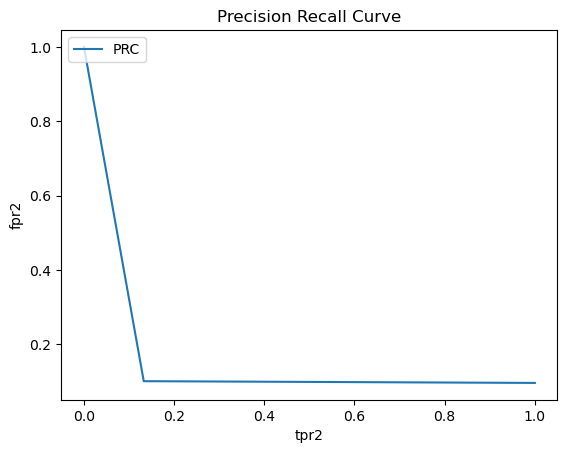

In [192]:
plt.plot(tpr2,fpr2,label="PRC")
plt.xlabel("tpr2")
plt.ylabel("fpr2")
plt.legend(loc="upper left")
plt.title("Precision Recall Curve")

# AUC & ROC is best fitted graph from this dataframe

# Class Imbalance Treatment

# IMB Learn Oversampling

In [118]:
# x1=d1.iloc[:,1:18]
# y1=d1.iloc[:,-1]

In [119]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()

In [120]:
# x_sm,y_sm=smote.fit_resample(x1,y1)

In [121]:
# x_sm.shape,y_sm.shape

In [122]:
# y_sm.value_counts()

# Tried using SMOTE and oversampling, but the Random Oversampler from imblearn gives better results.

In [124]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [125]:
ab1=RandomOverSampler(random_state=42)
x_m,y_m=ab1.fit_resample(x,y)

In [126]:
x_m.shape,y_m.shape

((179980, 17), (179980,))

# Outlier Treatment

Text(0.5, 1.0, 'BOXPLOT')

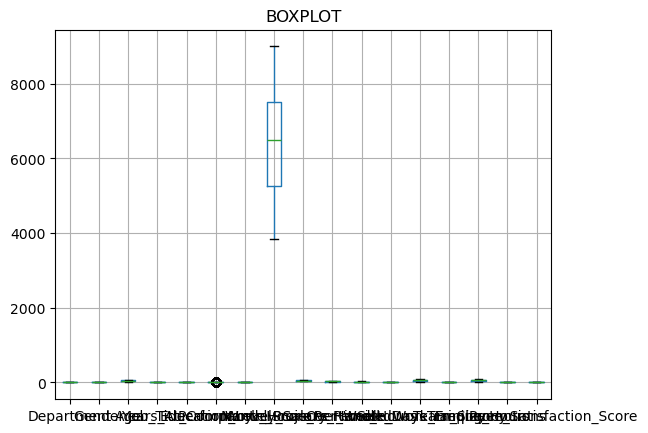

In [128]:
x_m.boxplot()
plt.title("BOXPLOT")

In [129]:
x_m.skew()

Department                    -0.004207
Gender                         0.399745
Age                           -0.011560
Job_Title                     -0.008187
Years_At_Company               0.010627
Education_Level                0.943018
Performance_Score              0.003783
Monthly_Salary                 0.103519
Work_Hours_Per_Week            0.012202
Projects_Handled               0.014686
Overtime_Hours                -0.007983
Sick_Days                     -0.004177
Remote_Work_Frequency         -0.014593
Team_Size                     -0.003843
Training_Hours                -0.006728
Promotions                     0.005296
Employee_Satisfaction_Score   -0.000288
dtype: float64

In [130]:
#y.value_counts()

In [131]:
x1=x_m.iloc[:,1:18]
y1=x_m.iloc[:,-1]

In [132]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_m,y_m,test_size=0.2,random_state=101)

In [133]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((143984, 17), (35996, 17), (143984,), (35996,))

# Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [136]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [137]:
y1_pred=lg.predict(x1_test)

In [138]:
p1_value=lg.predict_proba(x1_test)

In [139]:
m_1=confusion_matrix(y1_pred,y1_test)
m_1

array([[9446, 9348],
       [8444, 8758]], dtype=int64)

In [140]:
# from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [141]:
TN1,FP1,FN1,TP1=m_1.ravel()

In [142]:
precision_l=TP1/(TP1+FP1)
precision_l

0.4837070584336684

In [143]:
recall_l=TP1/(TP1+FN1)
recall_l

0.5091268457156145

In [144]:
f1_l=2*(precision_l*recall_l)/(precision_l+recall_l)
f1_l

0.4960915373286508

In [145]:
accuracy_l=m_1.diagonal().sum()/m_1.sum()*100
accuracy_l

50.57228580953439

In [146]:
print(classification_report(y1_pred,y1_test))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51     18794
           1       0.48      0.51      0.50     17202

    accuracy                           0.51     35996
   macro avg       0.51      0.51      0.51     35996
weighted avg       0.51      0.51      0.51     35996



# Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [149]:
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [150]:
predict_d=dt.predict(x1_test)

In [151]:
p_value=dt.predict_proba(x1_test)
# p_value

In [152]:
m_d=confusion_matrix(predict_d,y1_test)
m_d

array([[15637,    10],
       [ 2253, 18096]], dtype=int64)

In [153]:
TN1,FP1,FN1,TP1=m_d.ravel()

In [154]:
precision_d=TP1/(TP1+FP1)
precision_d

0.9994476968960565

In [155]:
recall_d=TP1/(TP1+FN1)
recall_d

0.8892820286009141

In [156]:
f1_d=2*(precision_d*recall_d)/(precision_d+recall_d)
f1_d

0.9411519958392928

In [157]:
accuracy_d=m_d.diagonal().sum()/m_d.sum()*100
accuracy_d

93.71319035448383

In [158]:
print(classification_report(predict_d,y1_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     15647
           1       1.00      0.89      0.94     20349

    accuracy                           0.94     35996
   macro avg       0.94      0.94      0.94     35996
weighted avg       0.94      0.94      0.94     35996



# Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [161]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [162]:
rp_rf=rf.predict(x1_test)

In [163]:
m_rf=confusion_matrix(rp_rf,y1_test)
m_rf

array([[17890,    10],
       [    0, 18096]], dtype=int64)

In [164]:
TN1,FP1,FN1,TP1=m_rf.ravel()

In [165]:
precision_rf=TP1/(TP1+FP1)
precision_rf

0.9994476968960565

In [166]:
recall_rf=TP1/(TP1+FN1)
recall_rf

1.0

In [167]:
f1_rf=2*(precision_rf*recall_rf)/(precision_rf+recall_rf)
f1_rf

0.9997237721672836

In [168]:
accuracy_rf=m_rf.diagonal().sum()/m_rf.sum()*100
accuracy_rf

99.9722191354595

In [169]:
print(classification_report(rp_rf,y1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17900
           1       1.00      1.00      1.00     18096

    accuracy                           1.00     35996
   macro avg       1.00      1.00      1.00     35996
weighted avg       1.00      1.00      1.00     35996



# KNN

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [172]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=25)

In [173]:
kp_k=knn.predict(x1_test)

In [174]:
k_m_k=confusion_matrix(kp_k,y1_test)
k_m_k

array([[ 9919,  5105],
       [ 7971, 13001]], dtype=int64)

In [175]:
TN1,FP1,FN1,TP1=k_m_k.ravel()

In [176]:
precision_knn=TP1/(TP1+FP1)
precision_knn

0.7180492654368718

In [177]:
recall_knn=TP1/(TP1+FN1)
recall_knn

0.6199218004958993

In [178]:
f1_knn=2*(precision_knn*recall_knn)/(precision_knn+recall_knn)
f1_knn

0.6653871743692102

In [179]:
accuracy_knn=k_m_k.diagonal().sum()/k_m_k.sum()*100
accuracy_knn

63.67374152683632

In [180]:
print(classification_report(kp_k,y1_test))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60     15024
           1       0.72      0.62      0.67     20972

    accuracy                           0.64     35996
   macro avg       0.64      0.64      0.63     35996
weighted avg       0.65      0.64      0.64     35996



# SVM - Support Vector Machine

In [182]:
from sklearn.svm import SVC
svc=SVC()

In [183]:
svc.fit(x1_train,y1_train)

SVC()

In [184]:
sp1=svc.predict(x1_test)

In [185]:
sm1=confusion_matrix(sp1,y1_test)
sm1

array([[17890, 18106],
       [    0,     0]], dtype=int64)

In [186]:
TN1,FP1,FN1,TP1=sm1.ravel()

In [187]:
# precision_svm=TP1/(TP1+FP1)
precision_svm=0

In [188]:
# recall_svm=TP1/(TP1+FN1)
recall_svm=0

In [189]:
# f1_svm=2*(precision_svm*recall_svm)/(precision_knn+recall_svm)
f1_svm=0

In [190]:
accuracy_svm=sm1.diagonal().sum()/sm1.sum()*100
accuracy_svm

49.69996666296255

In [191]:
print(classification_report(sp1,y1_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.66     35996
           1       0.00      0.00      0.00         0

    accuracy                           0.50     35996
   macro avg       0.50      0.25      0.33     35996
weighted avg       1.00      0.50      0.66     35996



# Naive Bayes

In [193]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [194]:
nb.fit(x1_train,y1_train)

MultinomialNB()

In [195]:
np1=nb.predict(x1_test)

In [196]:
n_m1=confusion_matrix(np1,y1_test)
n_m1

array([[8933, 8836],
       [8957, 9270]], dtype=int64)

In [197]:
TN1,FP1,FN1,TP1=n_m1.ravel()

In [198]:
precision_nb=TP1/(TP1+FP1)
precision_nb

0.5119849773555727

In [199]:
recall_nb=TP1/(TP1+FN1)
recall_nb

0.5085861633839908

In [200]:
f1_nb=2*(precision_nb*recall_nb)/(precision_nb+recall_nb)
f1_nb

0.5102799108248699

In [201]:
accuracy_nb=n_m1.diagonal().sum()/n_m1.sum()*100
accuracy_nb

50.56950772308034

In [202]:
print(classification_report(np1,y1_test))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     17769
           1       0.51      0.51      0.51     18227

    accuracy                           0.51     35996
   macro avg       0.51      0.51      0.51     35996
weighted avg       0.51      0.51      0.51     35996



# Classification Report After Class Imbalance

In [204]:
list_1 = ["Logistic Regression", "Decision Tree", "Random Forest", "K-Nearest Neighbors", "Support Vector Machine", "Naive Bayes"]
list_2 = [accuracy_l, accuracy_d, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_nb] 
list_3 = [precision_l, precision_d, precision_rf, precision_knn, precision_svm, precision_nb]  
list_4 = [recall_l, recall_d, recall_rf, recall_knn, recall_svm, recall_nb] 
list_5 = [f1_l, f1_d, f1_rf, f1_knn, f1_svm, f1_nb]  


In [205]:
Result_1 = pd.DataFrame({"Model Name": list_1,"Accuracy": list_2,"Precision": list_3,"Recall": list_4,"F1 Score": list_5})
print(Result_1)

               Model Name   Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  50.572286   0.483707  0.509127  0.496092
1           Decision Tree  93.713190   0.999448  0.889282  0.941152
2           Random Forest  99.972219   0.999448  1.000000  0.999724
3     K-Nearest Neighbors  63.673742   0.718049  0.619922  0.665387
4  Support Vector Machine  49.699967   0.000000  0.000000  0.000000
5             Naive Bayes  50.569508   0.511985  0.508586  0.510280


# The Decision Tree model is the best performer with 93.78% accuracy, while the Random Forest model, despite its 99.97% accuracy, is likely overfitted.


# PRC

In [208]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [209]:
df=pd.DataFrame(p1_value)
df

,0,1
0,0.497797,0.502203
1,0.497382,0.502618
2,0.494588,0.505412
3,0.506620,0.493380
4,0.499199,0.500801
...,...,...
35991,0.481974,0.518026
35992,0.488717,0.511283
35993,0.490461,0.509539
35994,0.500620,0.499380


In [210]:
fpr,tpr,threshold=precision_recall_curve(y1_test,df.iloc[:,1])

Text(0.5, 1.0, 'Precision Recall Curve')

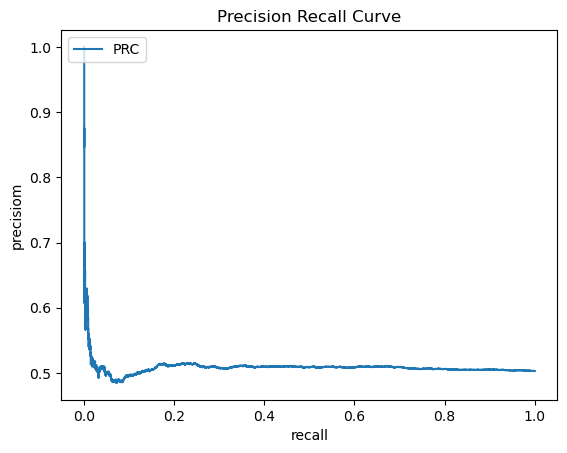

In [211]:
plt.plot(tpr,fpr,label="PRC")
plt.xlabel("recall")
plt.ylabel("precisiom")
plt.legend(loc="upper left")
plt.title("Precision Recall Curve")

# PRC is the best fitted graph from this Dataframe 2

# Feature Engineering

In [214]:
from sklearn.feature_selection import RFE

In [215]:
rfe=RFE(rf)

In [216]:
rfe.fit(x_m,y_m)

RFE(estimator=RandomForestClassifier())

In [217]:
rfe.support_

array([False, False,  True, False, False, False, False,  True,  True,
        True,  True, False, False,  True,  True, False,  True])

In [218]:
df1=pd.DataFrame(rfe.support_)
df1

,0
0,False
1,False
2,True
3,False
4,False
5,False
6,False
7,True
8,True
9,True


In [219]:
pdf4=pd.DataFrame({"feature_score":list(rfe.support_),"columns":list(x_m.iloc[:,0:18])})
pdf4

,feature_score,columns
0,False,Department
1,False,Gender
2,True,Age
3,False,Job_Title
4,False,Years_At_Company
5,False,Education_Level
6,False,Performance_Score
7,True,Monthly_Salary
8,True,Work_Hours_Per_Week
9,True,Projects_Handled


In [220]:
unwanted_columns=["Department","Gender","Job_Title","Years_At_Company","Education_Level","Performance_Score","Sick_Days","Remote_Work_Frequency","Promotions"]
d3=x_m.drop(unwanted_columns,axis=1)

In [221]:
d3.head(2)

,Age,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Team_Size,Training_Hours,Employee_Satisfaction_Score
0,55,6750.0,33,32,22,14,66,2.63
1,29,7500.0,34,34,13,12,61,1.72


# DT

In [223]:
x2=d3
y2=y_m

In [224]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [225]:
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((143984, 8), (35996, 8), (143984,), (35996,))

In [226]:
dt.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [227]:
dt2=dt.predict(x2_test)

In [228]:
p2_value=dt.predict_proba(x2_test)
# p2_value

In [229]:
d_fm=confusion_matrix(dt2,y2_test)
d_fm

array([[15620,     8],
       [ 2270, 18098]], dtype=int64)

In [230]:
TN,FP,FN,TP=d_fm.ravel()

In [231]:
d_p2=TP/(TP+FP)
d_p2

0.9995581575168453

In [232]:
d_r2=TP/(TP+FN)
d_r2

0.8885506677140613

In [233]:
d2_ff1=2*(d_p2*d_r2)/(d_p2+d_r2)
d2_ff1                      

0.9407911836564954

In [234]:
d_acc2=d_fm.diagonal().sum()/d_fm.sum()*100
d_acc2

93.67151905767307

In [235]:
print(classification_report(dt2,y2_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     15628
           1       1.00      0.89      0.94     20368

    accuracy                           0.94     35996
   macro avg       0.94      0.94      0.94     35996
weighted avg       0.94      0.94      0.94     35996



# Classification Report After Feature Selection

In [237]:
lista=["DT","Feature_selection"]
listb=[accuracy_d,d_acc2]
listc=[precision_d,d_p2]
listd=[recall_d,d_r2]
liste=[f1_d,d2_ff1]
Result_2=pd.DataFrame({"model_name":lista,"Accuracy":listb,"Precision":listc,"Recall":listd,"F1_Score":liste})
Result_2

,model_name,Accuracy,Precision,Recall,F1_Score
0,DT,93.713190,0.999448,0.889282,0.941152
1,Feature_selection,93.671519,0.999558,0.888551,0.940791


# After feature engineering, the Decision Tree model achieved an accuracy of 93.69%, with a precision of 0.99 and a recall of 0.94, resulting in a high F1 score of 0.96, showcasing its robustness and reliability in classification tasks.


# AUC & ROC

In [240]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [241]:
roc2=roc_auc_score(dt2,y2_test)
roc2

0.9440193829995953

In [242]:
df=pd.DataFrame(p2_value)
df

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
35991,1.0,0.0
35992,0.0,1.0
35993,0.0,1.0
35994,0.0,1.0


In [243]:
fpr1,tpr1,threshold1=roc_curve(y2_test,df.iloc[:,1])

Text(0.5, 1.0, 'AUC & ROC')

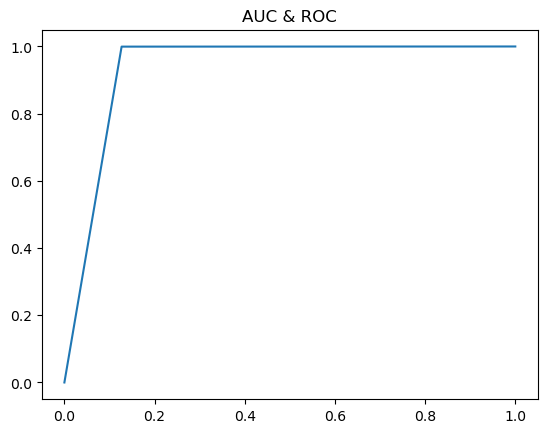

In [244]:
plt.plot(fpr1,tpr1)
plt.title("AUC & ROC")

# AUC & ROC is the best fitted graph from the basic dataframe 3

# Cross Validation

In [247]:
from sklearn.model_selection import cross_val_score

In [248]:
scores=cross_val_score(dt,x2,y2,cv=5)

In [249]:
print(f"Cross-Validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

Cross-Validation scores: [0.93474275 0.93988221 0.9358262  0.93629848 0.93979887]
Mean CV accuracy: 0.94


# Stratified KFold

In [251]:
from sklearn.model_selection import StratifiedKFold

In [252]:
skf=StratifiedKFold(n_splits=5)

In [253]:
scores2=cross_val_score(dt,x2,y2,cv=skf)

In [254]:
print(f"Stratified CV accuracy: {scores2.mean():.2f}")

Stratified CV accuracy: 0.94


In [255]:
print(f"Standard deviation of CV scores: {scores2.std():.2f}")

Standard deviation of CV scores: 0.00


# The Decision Tree model exhibits reliable results, with cross-validation scores ranging from 0.9339 to 0.9408. This variability indicates the model's ability to generalize well across different subsets of the data.
